# 01-01. 都道府県別の1日ごとの感染者数・死亡者数

下記で公開されているデータを利用し、可視化を試みる。

タイトル|Link|説明
-----|--------|--------|
NHK 特設サイト 新型コロナ データ一覧 |<a href="https://www3.nhk.or.jp/news/special/coronavirus/data-widget/">https://www3.nhk.or.jp/news/special/coronavirus/data-widget/</a>| NHKによるまとめ　新型コロナウイルス関連データ・ダウンロードサービス |

**データ出典：「新型コロナ関連の情報提供:NHK等」**

本コンテンツでは、その中でも「都道府県ごとの感染状況」データに着目し、ダウンロードすることを前提にグラフ化している。

参考までに、データの配置は本ファイルと同じフォルダ内に、

```yyyymmdd フォルダ```

を作成し、その中に 

```nhk_news_covid19_prefectures_daily_data.csv```

のようにCSVファイルが置かれていることを想定している。グラフ画像は同フォルダに出力される。

In [22]:
#!pip install japanize-matplotlib

In [1]:
# Google Colab Matplotlib 日本語フォント対応用
# Google Colab を利用する場合は、下記コメントアウトを解除してください。

'''
!pip install japanize_matplotlib

import matplotlib.pyplot as plt
import japanize_matplotlib 
import seaborn as sns
sns.set(font="IPAexGothic")
'''

'\n!pip install japanize_matplotlib\n\nimport matplotlib.pyplot as plt\nimport japanize_matplotlib \nimport seaborn as sns\nsns.set(font="IPAexGothic")\n'

In [23]:
'''Main'''
import numpy as np
import pandas as pd
import os
import datetime as dt

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()

import japanize_matplotlib
japanize_matplotlib.japanize()

%matplotlib inline

In [3]:
# matplotlib の設定を調整   
plt.rcParams['font.family'] = 'IPAexGothic'
#plt.rcParams["figure.figsize"] = [18, 10]
plt.rcParams['font.size'] = 12 #フォントサイズを設定 default : 12
plt.rcParams['xtick.labelsize'] = 16 # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 16

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 150)
#pd.options.display.float_format = '{:.2f}'.format

In [4]:
#date
current_path = os.getcwd()

############################################
## 下記を変更してください
getting_data_date = '20220613'
############################################

fig01_filename = '01_Number_of_infected_persons_per_day_by_pref_{}'.format(getting_data_date)
fig02_filename = '02_Number_of_deaths_per_day_by_pref_{}'.format(getting_data_date)
fig03_filename = '03_Cumulative_number_of_infected_persons_per_day_by_pref_{}'.format(getting_data_date)
fig04_filename = '04_Cumulative_number_of_deaths_per_day_by_pref_{}'.format(getting_data_date)

fig01_filePath = current_path + os.path.sep.join(['', '{}'.format(getting_data_date), fig01_filename])
fig02_filePath = current_path + os.path.sep.join(['', '{}'.format(getting_data_date), fig02_filename])
fig03_filePath = current_path + os.path.sep.join(['', '{}'.format(getting_data_date), fig03_filename])
fig04_filePath = current_path + os.path.sep.join(['', '{}'.format(getting_data_date), fig04_filename])

fig01_title = 'Number of infected persons per day by pref : {}'.format(getting_data_date)
fig02_title = 'Number of deaths per day by pref : {}'.format(getting_data_date)
fig03_title = 'Cumulative number of infected persons per day by pref : {}'.format(getting_data_date)
fig04_title = 'Cumulative number of deaths per day by pref : {}'.format(getting_data_date)

# 以下は 01-01-02b. 都道府県別の1日ごとの死亡者数（兵庫県の異常値対応）のグラフ用
fig02_filename_new = '02_Number_of_deaths_per_day_by_pref_new_{}'.format(getting_data_date)
fig02_filePath_new = current_path + os.path.sep.join(['', '{}'.format(getting_data_date), fig02_filename_new])
fig02_title_new = 'Number of deaths per day by pref（改）: {}'.format(getting_data_date)



In [5]:
# Acquire Data
csv_01_file = os.path.sep.join(['', '{}'.format(getting_data_date), 'nhk_news_covid19_prefectures_daily_data.csv'])
data = pd.read_csv(current_path + csv_01_file)

In [6]:
data

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,各地の直近1週間の人口10万人あたりの感染者数
0,2020/1/16,1,北海道,0,0,0,0,NaN
1,2020/1/17,1,北海道,0,0,0,0,NaN
2,2020/1/18,1,北海道,0,0,0,0,NaN
3,2020/1/19,1,北海道,0,0,0,0,NaN
4,2020/1/20,1,北海道,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...
41355,2022/6/9,47,沖縄県,1353,226820,0,466,594.62
41356,2022/6/10,47,沖縄県,1440,228260,4,470,602.39
41357,2022/6/11,47,沖縄県,1368,229628,0,470,604.23
41358,2022/6/12,47,沖縄県,1126,230754,0,470,595.99


In [7]:
# 日付データをdatetime64変換
data['日付'] = pd.to_datetime(data['日付'])
data

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,各地の直近1週間の人口10万人あたりの感染者数
0,2020-01-16,1,北海道,0,0,0,0,NaN
1,2020-01-17,1,北海道,0,0,0,0,NaN
2,2020-01-18,1,北海道,0,0,0,0,NaN
3,2020-01-19,1,北海道,0,0,0,0,NaN
4,2020-01-20,1,北海道,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...
41355,2022-06-09,47,沖縄県,1353,226820,0,466,594.62
41356,2022-06-10,47,沖縄県,1440,228260,4,470,602.39
41357,2022-06-11,47,沖縄県,1368,229628,0,470,604.23
41358,2022-06-12,47,沖縄県,1126,230754,0,470,595.99


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41360 entries, 0 to 41359
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   日付                       41360 non-null  datetime64[ns]
 1   都道府県コード                  41360 non-null  int64         
 2   都道府県名                    41360 non-null  object        
 3   各地の感染者数_1日ごとの発表数         41360 non-null  int64         
 4   各地の感染者数_累計               41360 non-null  int64         
 5   各地の死者数_1日ごとの発表数          41360 non-null  int64         
 6   各地の死者数_累計                41360 non-null  int64         
 7   各地の直近1週間の人口10万人あたりの感染者数  41078 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [9]:
type(data.loc[0, '日付'])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
data.describe()

,都道府県コード,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,各地の直近1週間の人口10万人あたりの感染者数
count,41360.000000,41360.000000,4.136000e+04,41360.000000,41360.000000,41078.000000
mean,24.000000,218.644318,3.225344e+04,0.747220,226.082930,44.654972
std,13.564824,866.714237,1.091745e+05,2.688527,563.762913,98.429860
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12.000000,0.000000,2.360000e+02,0.000000,3.000000,0.340000
50%,24.000000,9.000000,2.968500e+03,0.000000,41.000000,3.560000
75%,36.000000,93.000000,1.690625e+04,0.000000,137.000000,23.627500
max,47.000000,21562.000000,1.563080e+06,129.000000,5097.000000,1057.430000


In [11]:
data["都道府県名"].unique()

array(['北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県',
       '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
       '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府',
       '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県',
       '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県',
       '鹿児島県', '沖縄県'], dtype=object)

## 01-01-01. 都道府県別の1日ごとの感染者数

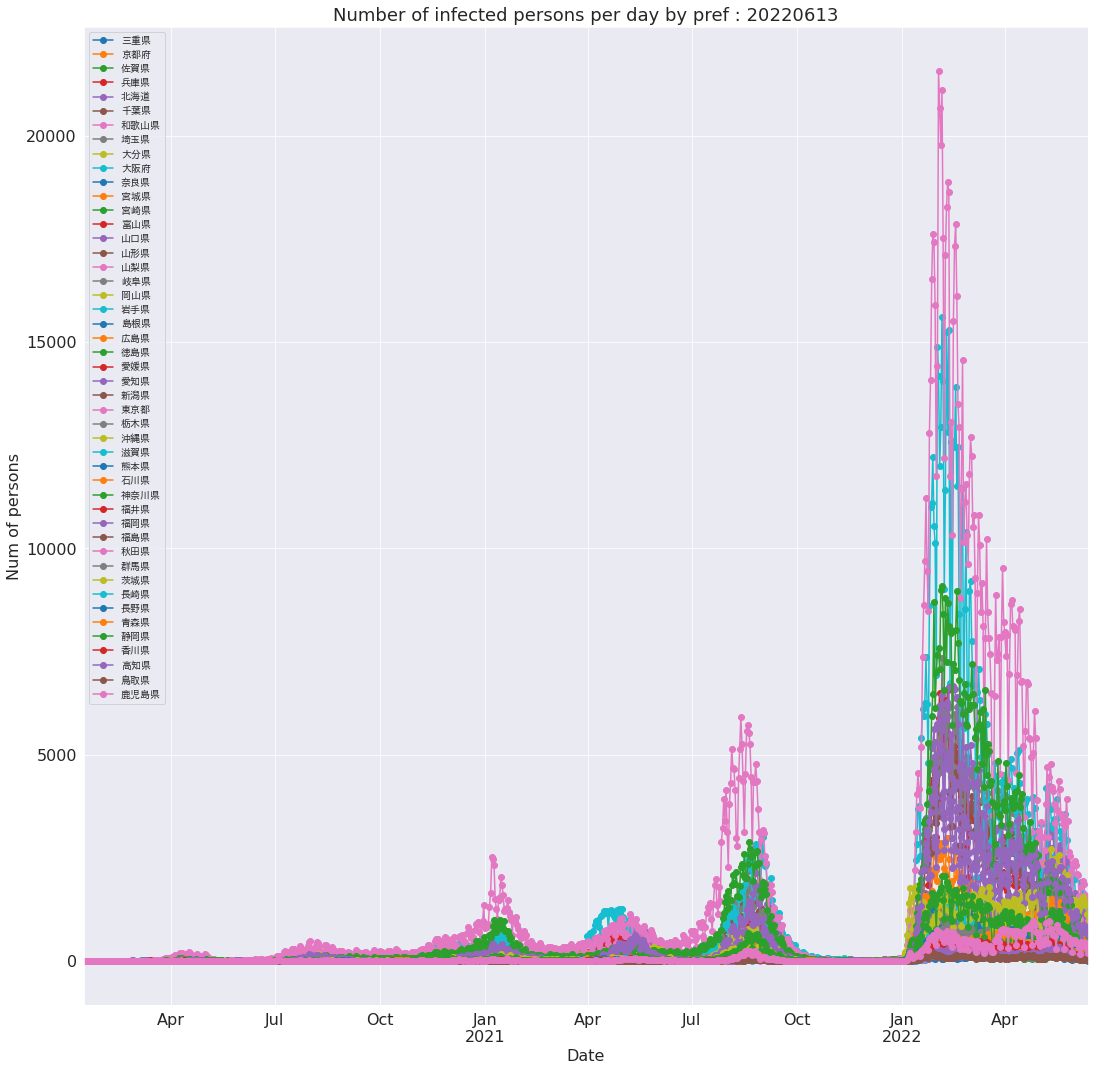

In [25]:
data.index = data['日付']
data.index.name=""
data.groupby("都道府県名")["各地の感染者数_1日ごとの発表数"].plot(x = "日付", marker='o')

sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams["figure.figsize"] = [18, 18]
plt.title(fig01_title, fontsize=18)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Num of persons", fontsize=16)
plt.legend()
plt.savefig(fig01_filePath, dpi=200)
plt.show()

## 01-01-02. 都道府県別の1日ごとの死亡者数

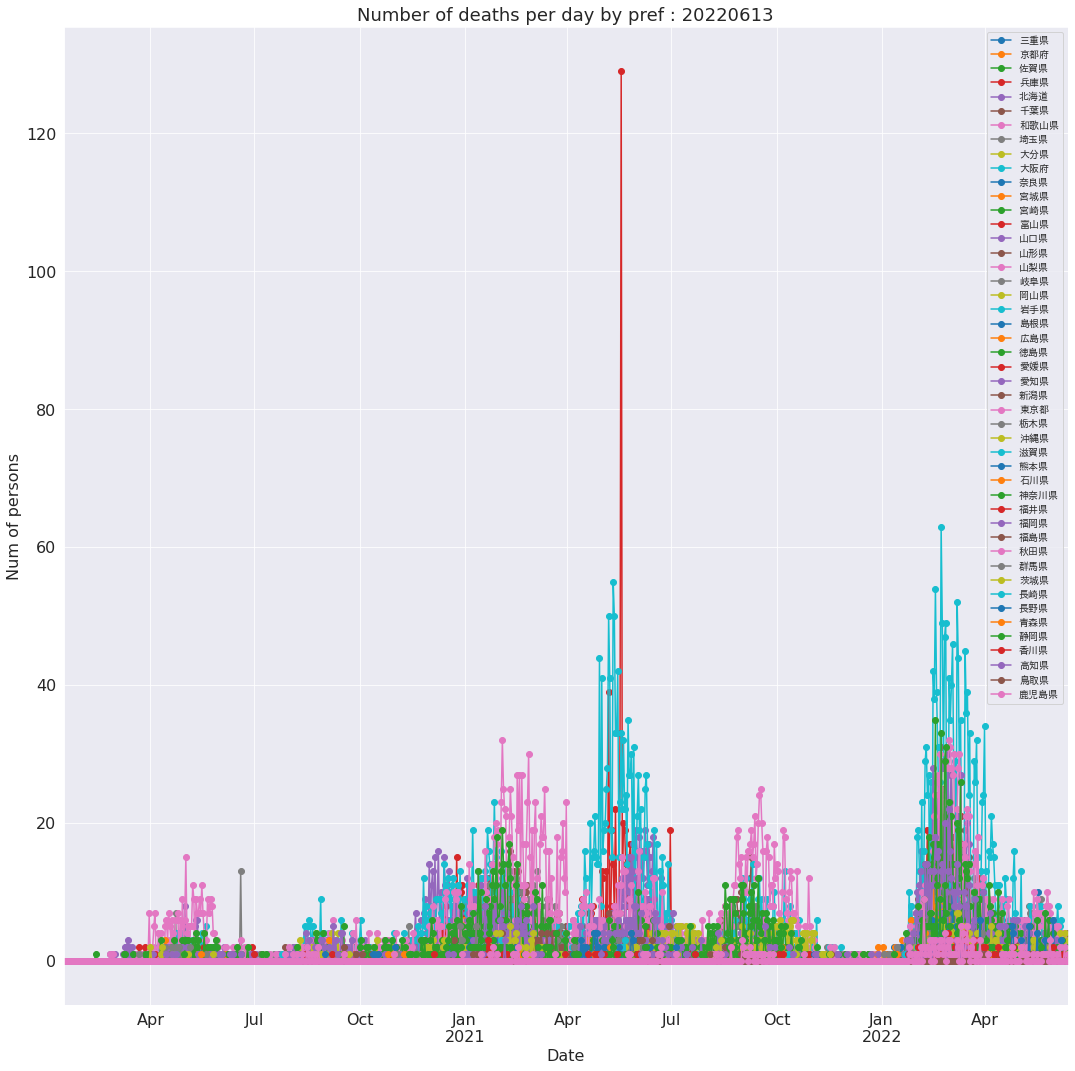

In [26]:
data.index = data['日付']
data.index.name=""
data.groupby("都道府県名")["各地の死者数_1日ごとの発表数"].plot(x = "日付", marker='o')

sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams["figure.figsize"] = [18, 18]
plt.title(fig02_title, fontsize=18)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Num of persons", fontsize=16)
plt.legend()

plt.savefig(fig02_filePath, dpi=200)
plt.show()

## 01-01-02b. 都道府県別の1日ごとの死亡者数（兵庫県の異常値対応）

上記グラフで注意が必要なのは、ひとつ突出している例外的なデータの存在である。調べてみると、2021年5月18日の兵庫県のデータであり、詳細は下記ニュースを参考にする。

https://www3.nhk.or.jp/news/html/20210518/k10013037951000.html

```
兵庫県は18日、新型コロナウイルスに感染していた129人の死亡が確認されたと発表しました。

このうち121人は、神戸市がことし3月26日から5月17日までの1か月半余りの期間に亡くなり、これまで計上していなかった人を、18日、まとめて発表したものです。

以上、NHKニュースより引用
```

以上より、この兵庫県のデータについては実態を反映していないと思われるが、1日の死者数としては適切でないため、異常値としての処理が必要であろう。

ここでは兵庫県の該当部分について以下のように処理する方針を立てる。

* 3月26日から5月17日は53日分であり、その間の兵庫県の未計上死亡者数が121人なので、平均して 2.28人であるから、その53日間については、従来の人数に2人分をデータに加算する。
* 2 x 53 = 106 人なので、121人との差は、121 - 106 = 15 人である。これを、兵庫県の2021年5月18日の未計上追加分ではない8名に追加し、15 + 8 = 23名とする。

以上のようにすることで、2021年5月18日の兵庫県の異常値は解消され、実際に即したものとする。修正したDataFrameを新たに作成し、可視化する。

In [27]:
data_2 = data.copy()
print(data_2.shape)

(41360, 8)


In [28]:
# 兵庫県の2021,3,26〜2021,5,18までのデータを抽出する
data_3 = data_2[(data_2.都道府県名 == '兵庫県') & (data_2.日付 >= dt.datetime(2021,3,26)) & (data_2.日付 < dt.datetime(2021,5,19))]

# 2021-05-18 以外のデータを2加算して変更
data_3.loc[data_3["日付"] != '2021-05-18', ["各地の死者数_1日ごとの発表数"]] = data_3["各地の死者数_1日ごとの発表数"] + 2
# 2021-05-18 のデータを23に変更
data_3.loc[data_3["日付"] == '2021-05-18', ["各地の死者数_1日ごとの発表数"]] = 23

# 各地の死者数_累計 をいったん削除し、改めて作成
data_3 = data_3.drop('各地の死者数_累計', axis=1)
data_3['各地の死者数_累計'] = 0

for i in range(len(data_3)):
    if (i == 0):
        data_3.iloc[i,6] = int(data_3.iloc[i,5] + 583)
    else:
        data_3.iloc[i,6] = int(data_3.iloc[i,5] + data_3.iloc[i - 1, 6])

#print(data_3.shape)


In [29]:
data_3

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の直近1週間の人口10万人あたりの感染者数,各地の死者数_累計
,,,,,,,,
2021-03-26,2021-03-26,28,兵庫県,116,19346,3,586.0,0
2021-03-27,2021-03-27,28,兵庫県,164,19510,2,588.0,0
2021-03-28,2021-03-28,28,兵庫県,91,19601,2,590.0,0
2021-03-29,2021-03-29,28,兵庫県,70,19671,4,594.0,0
2021-03-30,2021-03-30,28,兵庫県,176,19847,3,597.0,0
2021-03-31,2021-03-31,28,兵庫県,211,20058,6,603.0,0
2021-04-01,2021-04-01,28,兵庫県,199,20257,5,608.0,0
2021-04-02,2021-04-02,28,兵庫県,174,20431,2,610.0,0
2021-04-03,2021-04-03,28,兵庫県,205,20636,3,613.0,0


In [30]:
# 兵庫県の2021,3,26〜2021,5,18までのデータを削除する。つまりそれ以外のデータを抽出する
data_2 = data_2[(data_2.都道府県名 != '兵庫県') | (data_2.日付 < dt.datetime(2021,3,26)) | (data_2.日付 >= dt.datetime(2021,5,19))]
#print(data_2.shape)

# data_2 に data_3 を concat で縦結合する
data_2 = pd.concat([data_2, data_3])

# data_2 を都道府県コード・日付の昇順にソートする
data_2 = data_2.sort_values(["都道府県コード","日付"],ascending=[True, True])
# data_2.to_csv('./{}/data_2b.csv'.format(getting_data_date))
print(data_2.shape)

(41360, 8)


In [31]:
data_2

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,各地の直近1週間の人口10万人あたりの感染者数
,,,,,,,,
2020-01-16,2020-01-16,1,北海道,0,0,0,0,NaN
2020-01-17,2020-01-17,1,北海道,0,0,0,0,NaN
2020-01-18,2020-01-18,1,北海道,0,0,0,0,NaN
2020-01-19,2020-01-19,1,北海道,0,0,0,0,NaN
2020-01-20,2020-01-20,1,北海道,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...
2022-06-09,2022-06-09,47,沖縄県,1353,226820,0,466,594.62
2022-06-10,2022-06-10,47,沖縄県,1440,228260,4,470,602.39
2022-06-11,2022-06-11,47,沖縄県,1368,229628,0,470,604.23


/var/folders/z8/m3v1nl590vn0zp351lf1rtgh0000gn/T/ipykernel_53042/3815883116.py:13: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.savefig(fig02_filePath_new, dpi=200)
/var/folders/z8/m3v1nl590vn0zp351lf1rtgh0000gn/T/ipykernel_53042/3815883116.py:13: UserWarning: Glyph 25913 (\N{CJK UNIFIED IDEOGRAPH-6539}) missing from current font.
  plt.savefig(fig02_filePath_new, dpi=200)
/var/folders/z8/m3v1nl590vn0zp351lf1rtgh0000gn/T/ipykernel_53042/3815883116.py:13: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  plt.savefig(fig02_filePath_new, dpi=200)
/Users/kaoru/opt/anaconda3/envs/py38_business_analysis/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kaoru/opt/anaconda3/envs/py38_business_analysis/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarni

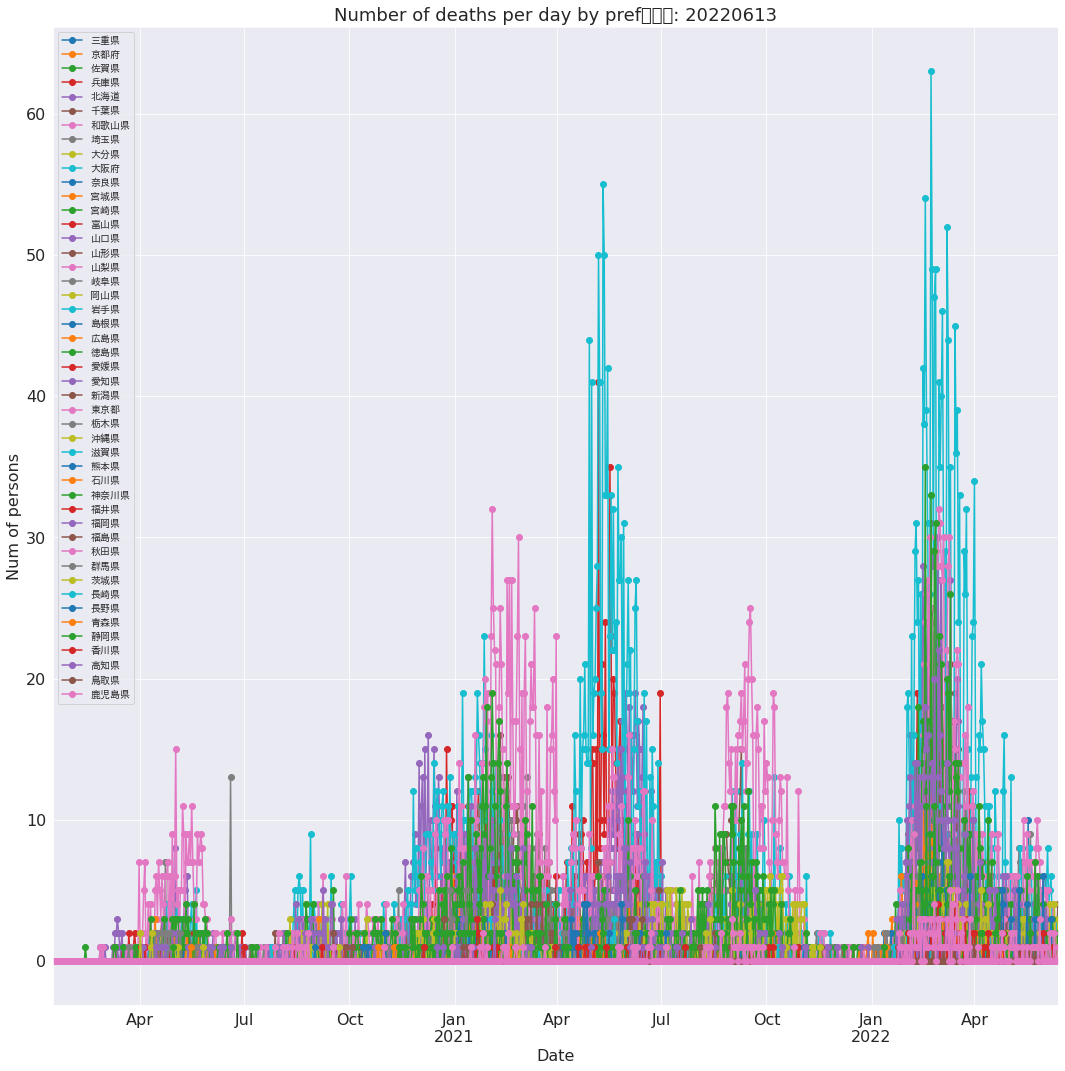

In [32]:
data_2.index = data_2['日付']
data_2.index.name=""
data_2.groupby("都道府県名")["各地の死者数_1日ごとの発表数"].plot(x = "日付", marker='o')

sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams["figure.figsize"] = [18, 18]
plt.title(fig02_title_new, fontsize=18)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Num of persons", fontsize=16)
plt.legend()

plt.savefig(fig02_filePath_new, dpi=200)
plt.show()

兵庫県の異常値が解消し、全体的な傾向が見やすくなった。

## 01-01-03. 都道府県別の累積感染者数

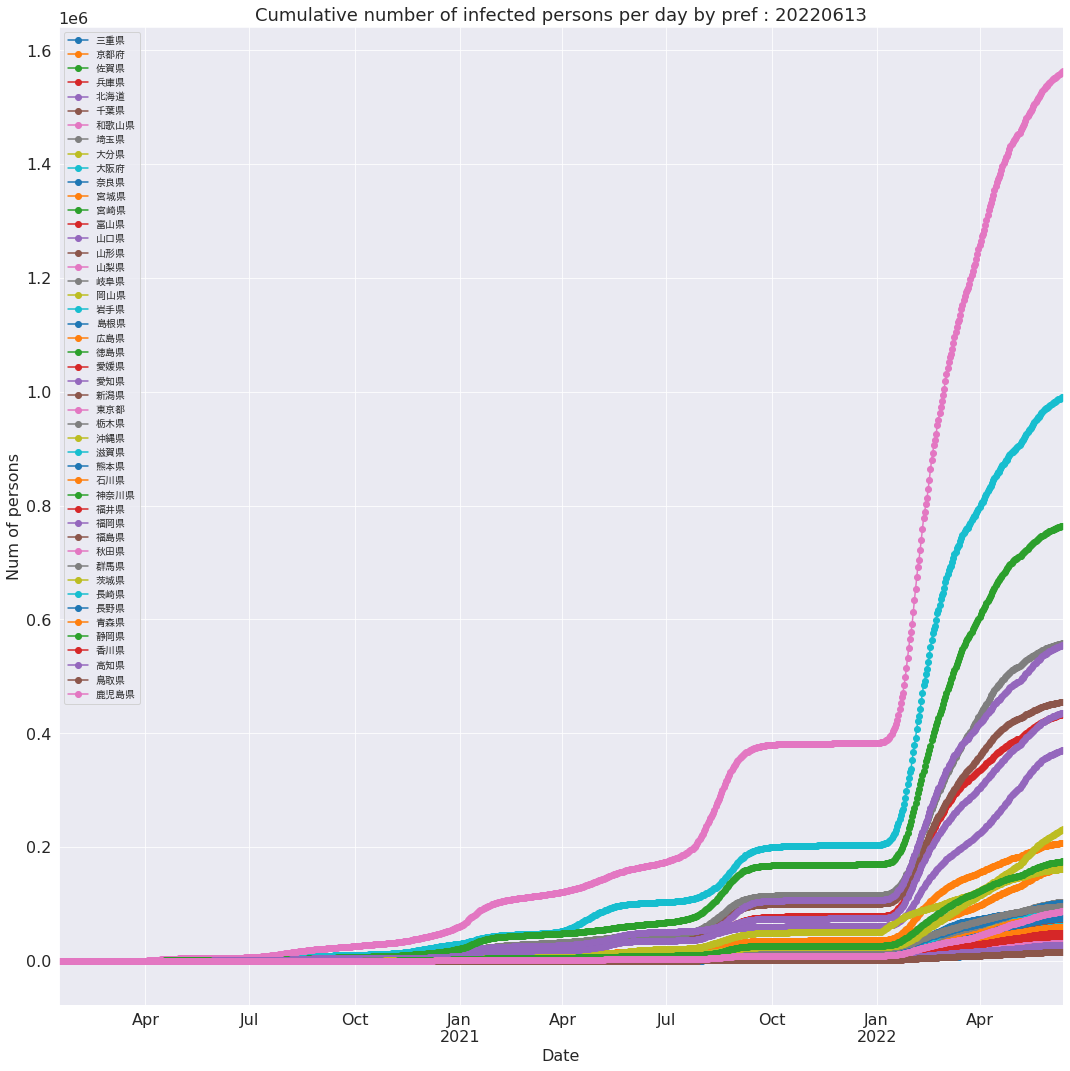

In [33]:
data.index = data['日付']
data.index.name=""
data.groupby("都道府県名")["各地の感染者数_累計"].plot(x = "日付", marker='o')

sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams["figure.figsize"] = [18, 18]
plt.title(fig03_title, fontsize=18)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Num of persons", fontsize=16)
plt.legend()

plt.savefig(fig03_filePath, dpi=200)
plt.show()

## 01-01-04. 都道府県別の累積死亡者数

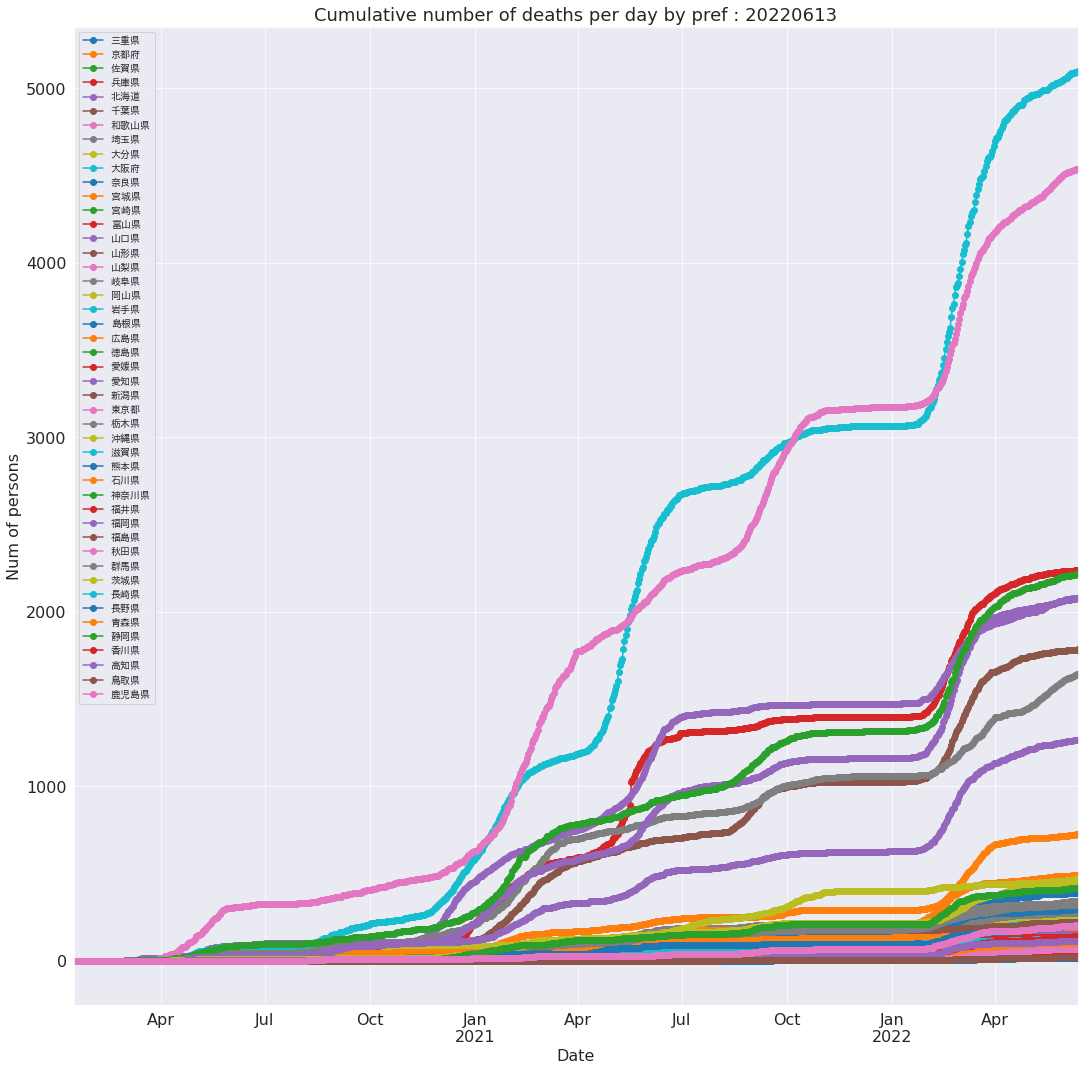

In [34]:
data.index = data['日付']
data.index.name=""
data.groupby("都道府県名")["各地の死者数_累計"].plot(x = "日付", marker='o')

sns.set_style('darkgrid')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams["figure.figsize"] = [18, 18]
plt.title(fig04_title, fontsize=18)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Num of persons", fontsize=16)
plt.legend()

plt.savefig(fig04_filePath, dpi=200)
plt.show()